# Explore Data

Exploring the fetched data with visualizations and summary.

## Setup

In [30]:
import json
import os

# suppress seaborn/scipy warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import seaborn as sns
import yake
from datetime import datetime

data_dir = os.path.abspath('data')

# today = datetime.today()
today = datetime.strptime('2022-09-27', '%Y-%m-%d')
today_s = today.strftime('%Y%m%d')

anime_df = pd.read_csv(os.path.join(data_dir, f'anime-{today_s}-clean.csv'))
anime_raw_df = pd.read_csv(os.path.join(data_dir, f'anime-{today_s}-raw.csv'))
user_df = pd.read_csv(os.path.join(data_dir, f'user-{today_s}-clean.csv'))
enriched_df = pd.read_csv(os.path.join(data_dir, f'user-{today_s}-enriched.csv'))

## Anime Data Visualizations

         source  count
0   LIGHT_NOVEL    613
1         MANGA   2628
2      ORIGINAL   1793
3         OTHER   1137
4    VIDEO_GAME    496
5  VISUAL_NOVEL    183


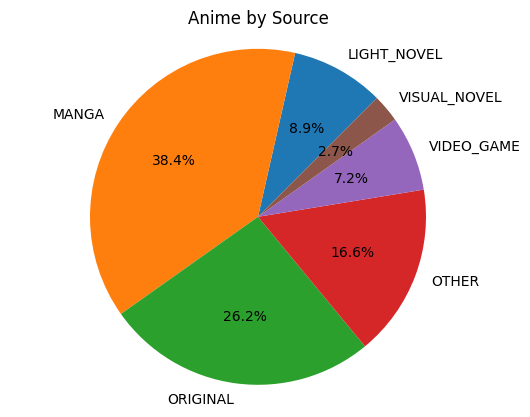

In [31]:
df = (anime_df.groupby(['source']).size().reset_index(name='count'))
print(df)

fig, ax = plt.subplots()
ax.set_title('Anime by Source')
ax.pie(df['count'], labels=df['source'], autopct='%1.1f%%', startangle=45)
ax.axis('equal')

plt.show()
plt.close()

   season  count
0    FALL   1812
1  SPRING   1855
2  SUMMER   1702
3  WINTER   1481


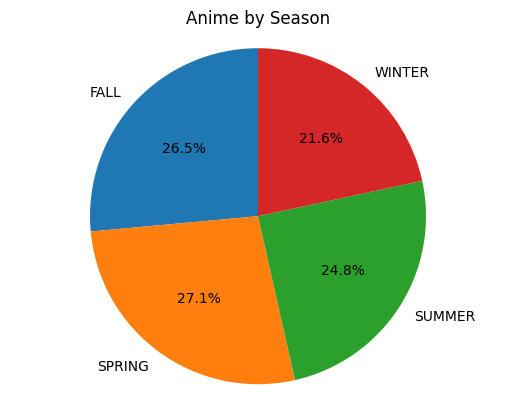

In [32]:
df = (anime_df.groupby(['season']).size().reset_index(name='count'))
print(df)

fig, ax = plt.subplots()
ax.set_title('Anime by Season')
ax.pie(df['count'], labels=df['season'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')

plt.show()
plt.close()

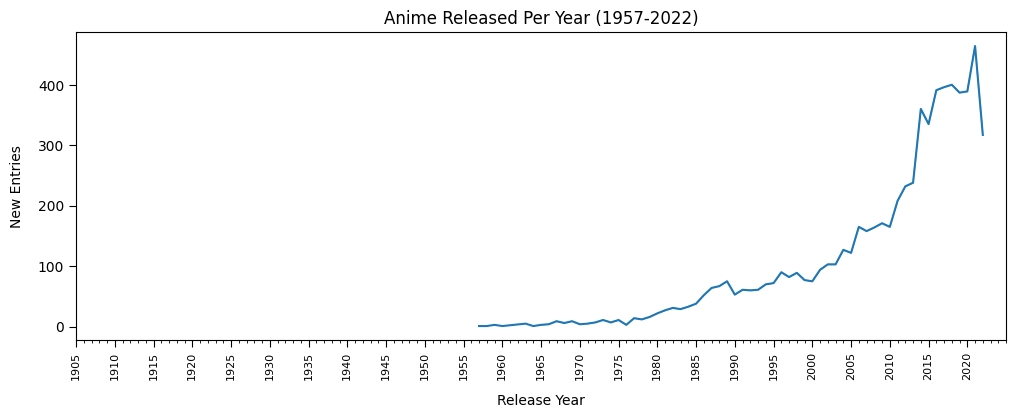

In [33]:
df = (anime_df[(anime_df['season_year'] <= today.year)].filter(['season_year', 'format']))
df['count'] = df.groupby('season_year')['season_year'].transform('count').apply(int)

step = 5
x_lim = [1905, 2025]

fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(ax=ax, data=df, x='season_year', y='count')
ax.set_title(f"Anime Released Per Year ({int(df['season_year'].min())}-{int(df['season_year'].max())})")

ax.set_xlabel('Release Year', labelpad=10)
ax.set_ylabel('New Entries', labelpad=10)

ax.set_xlim(x_lim)
ax.set_xticks(np.arange(x_lim[0], x_lim[1], step))
ax.set_xticklabels(ax.get_xticks(), rotation=90, fontsize=8)
ax.xaxis.set_minor_locator(mticker.AutoMinorLocator())

ax.tick_params(which='minor', length=2.5)
ax.tick_params(which='major', length=5)

plt.show()
plt.close()

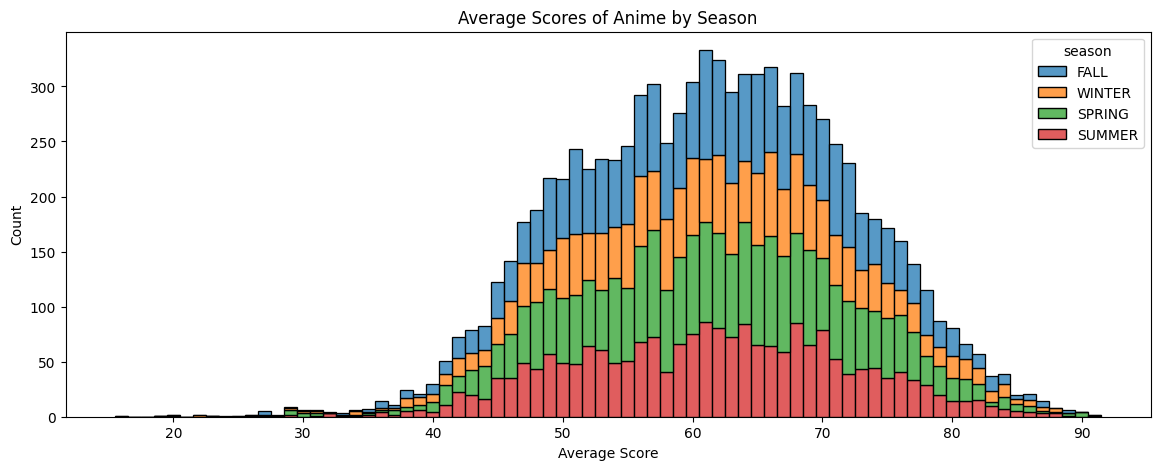

In [34]:
df = anime_raw_df.filter(['average_score', 'season']).dropna()

fig, ax = plt.subplots(figsize=(14,5))
sns.histplot(ax=ax, data=df, x='average_score', hue='season', multiple='stack', discrete=True)
ax.set(title='Average Scores of Anime by Season', xlabel='Average Score')

plt.show()
plt.close()

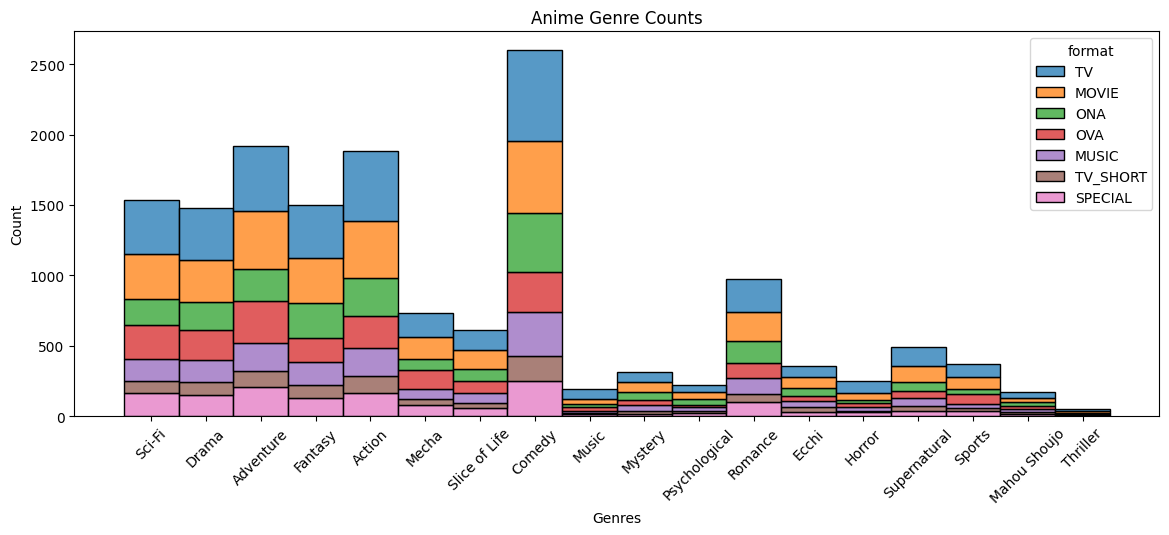

In [35]:
df = anime_raw_df.filter(['genres', 'format'])
df['genres'] = df['genres'].apply(json.loads).explode('genres').dropna()

fig, ax = plt.subplots(figsize=(14,5))
ax.set_title('Anime Genre Counts')
ax.set_xlabel('Genres', fontsize=10)
ax.tick_params(axis='x', rotation=45)
sns.histplot(ax=ax, data=df, x='genres', hue='format', multiple='stack', discrete=True)

plt.show()
plt.close()

In [36]:
# Top 25 Most Frequent Tags of Anilist

df = (anime_df).filter(['tags']).dropna()
df['tags'] = df['tags'].apply(json.loads).explode('tags')
df = df.groupby(['tags']).size().reset_index(name='count').sort_values('count', ascending=False)

df.head(25)

,tags,count
154,MALE PROTAGONIST,279
101,FEMALE PROTAGONIST,223
216,SHOUNEN,185
149,MAGIC,145
210,SCHOOL,143
248,TRAGEDY,136
124,HETEROSEXUAL,133
141,KUUDERE,126
228,SUPER POWER,120
173,NUDITY,118


## User Data Visualizations

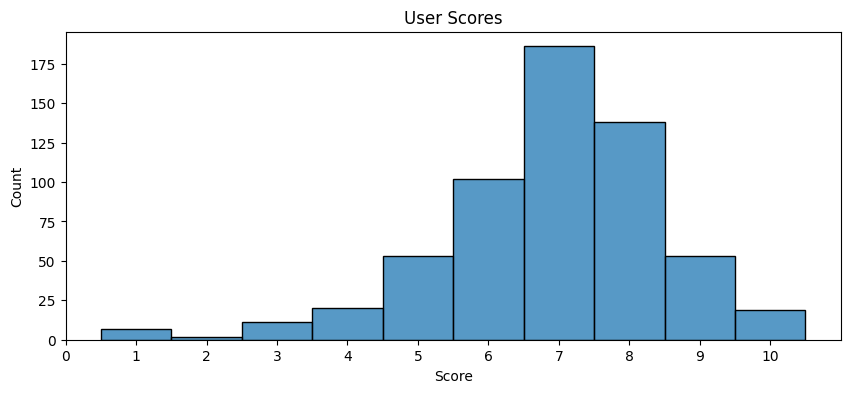

In [37]:
df = user_df[user_df['status'] == 'COMPLETED'].filter(['score', 'media_id']).dropna()

fig, ax = plt.subplots(figsize=(10,4))
sns.histplot(ax=ax, data=df, x='score', discrete=True)
ax.set(title='User Scores', xlabel='Score', xticks=np.arange(0, 11, 1))

plt.show()
plt.close()

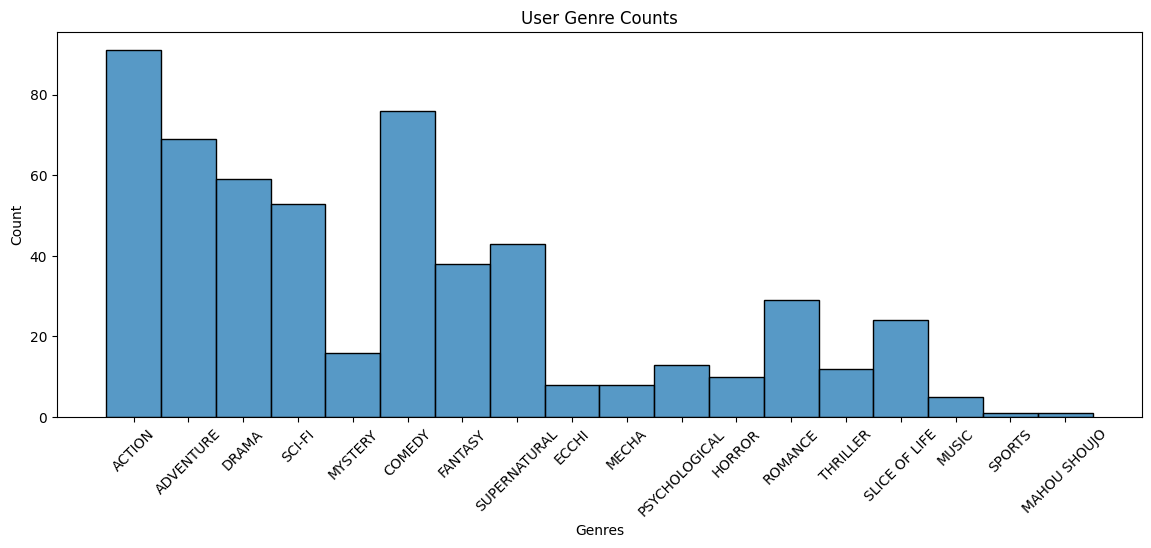

In [38]:
df = enriched_df.filter(['genres', 'score'])
df['genres'] = df['genres'].apply(json.loads).explode('genres').dropna()

fig, ax = plt.subplots(figsize=(14,5))
ax.set_title('User Genre Counts')
ax.set_xlabel('Genres', fontsize=10)
ax.tick_params(axis='x', rotation=45)
sns.histplot(ax=ax, data=df, x='genres', discrete=True)

plt.show()
plt.close()

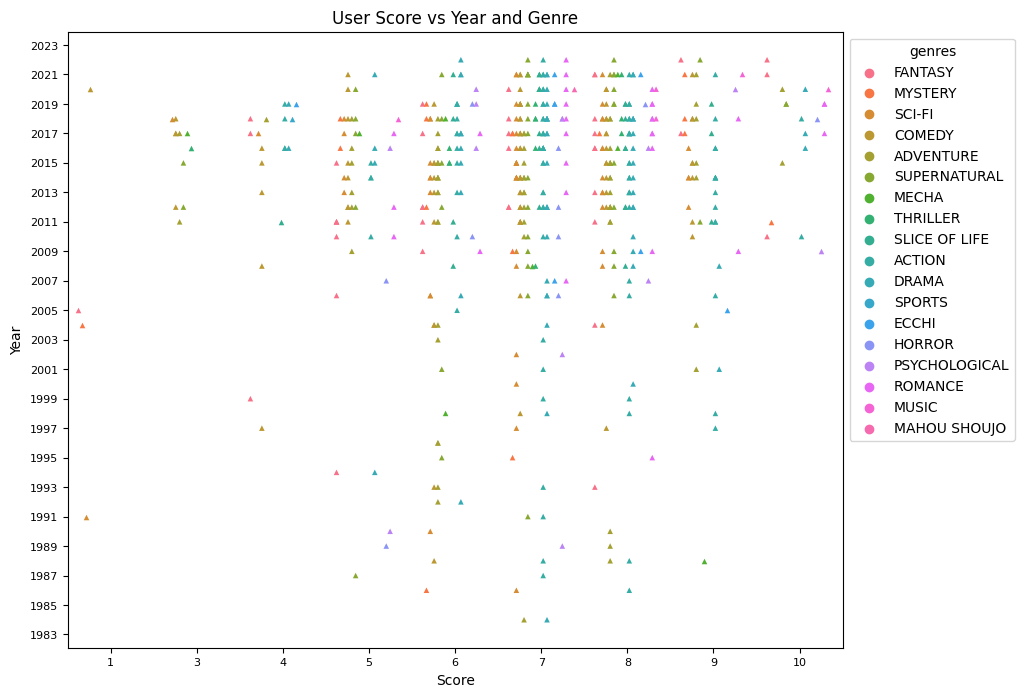

In [39]:
df = enriched_df.filter(['genres', 'score', 'season_year'])
df['genres'] = df['genres'].apply(json.loads).explode('genres').dropna()

fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('User Score vs Year and Genre')
ax.set_xlabel('Score', fontsize=10)
ax.set_ylabel('Year', fontsize=10)
ax.set_yticks(np.arange(df['season_year'].min()-5, df['season_year'].max()+5, 2))
ax.tick_params(labelsize=8)

sns.stripplot(ax=ax, data=df, x='score', y='season_year', hue='genres', dodge=True, jitter=0, s=4, marker='^')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

plt.show()
plt.grid()
plt.close()

In [40]:
# User Top 10 Most Watched Tags

df = enriched_df.filter(['tags'])
df['tags'] = df['tags'].apply(json.loads).explode('tags').dropna()
df = df.groupby(['tags']).size().reset_index(name='count').sort_values('count', ascending=False)

print(df.head(10), '\n')
print(df.shape[0], 'unique tags')

                 tags  count
83   MALE PROTAGONIST     19
104        PHILOSOPHY     14
146           TRAGEDY     12
11          ANTI-HERO     11
98             NUDITY     10
135       SUPER POWER      9
149            TRAVEL      9
90           MILITARY      9
6              ALIENS      9
29      COMING OF AGE      8 

166 unique tags


In [41]:
# User Top 25 Most Watched Studios

df = enriched_df.filter(['studios'])
df['studios'] = df['studios'].apply(json.loads).explode('studios').dropna()
df = df.groupby(['studios']).size().reset_index(name='count').sort_values('count', ascending=False)

print(df.head(25), '\n')
print(df.shape[0], 'unique studios')

               studios  count
96      TOEI ANIMATION     52
51            MADHOUSE     33
3         A-1 PICTURES     27
74        SILVER LINK.     23
17               BONES     23
46     KYOTO ANIMATION     22
43          J.C. STAFF     20
66      PRODUCTION I.G     20
105         WIT STUDIO     16
104          WHITE FOX     16
71               SHAFT     15
91             SUNRISE     12
23    DAVID PRODUCTION     11
82       STUDIO GHIBLI     11
18        BRAIN'S BASE     11
86      STUDIO PIERROT     10
53               MAPPA     10
80         STUDIO DEEN     10
61          P.A. WORKS      9
101           UFOTABLE      8
69           SATELIGHT      7
95   TMS ENTERTAINMENT      6
25           DOGA KOBO      6
49              LERCHE      6
21         CLOVERWORKS      6 

108 unique studios


/home/barrett/.local/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.draw()
/home/barrett/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/barrett/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


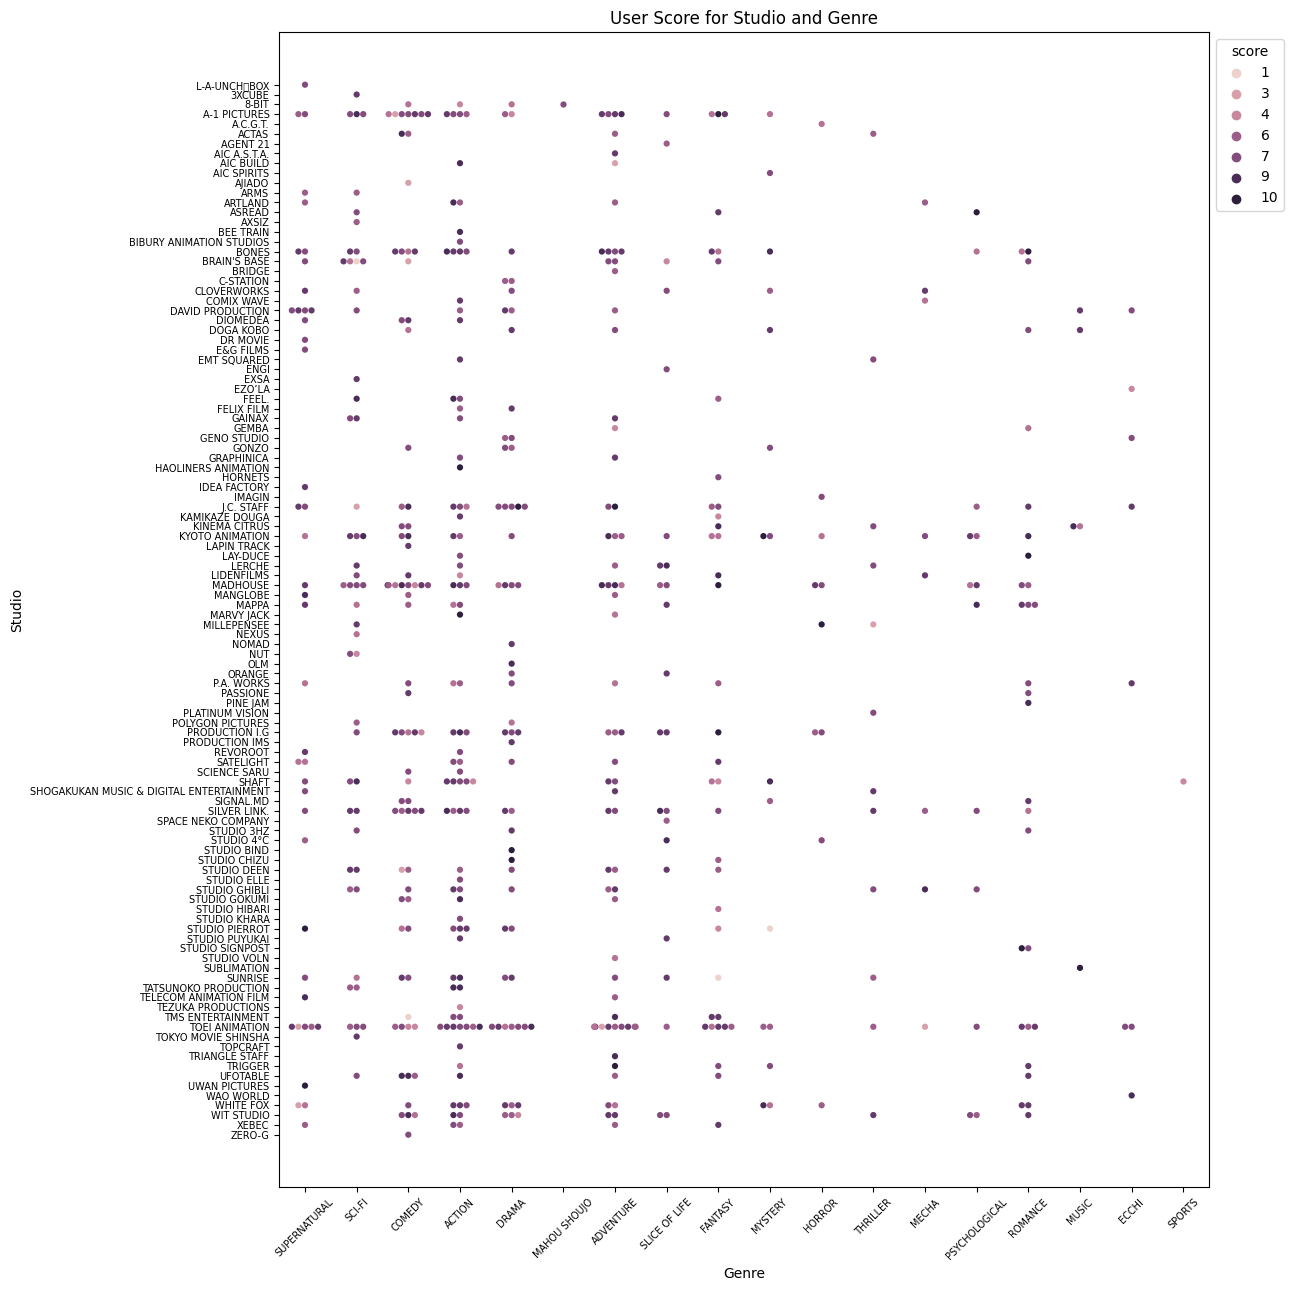

In [42]:
df = enriched_df.filter(['genres', 'score', 'studios'])
df['genres'] = df['genres'].apply(json.loads).explode('genres')
df['studios'] = df['studios'].apply(json.loads).explode('studios')
df = df.sort_values('studios')

fig, ax = plt.subplots(figsize=(12,15))
ax.set_title('User Score for Studio and Genre')
ax.set_xlabel('Genre', fontsize=10)
ax.set_ylabel('Studio', fontsize=10)
ax.tick_params(labelsize=7)
ax.tick_params(axis='x', rotation=45)

sns.swarmplot(ax=ax, data=df, x='genres', y='studios', hue='score', s=4.5)
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

plt.show()
plt.grid()
plt.close()

In [43]:
# Attempt to extract keywords from description of anime

kw_extractor = yake.KeywordExtractor(lan='en', n=3, dedupLim=0.2, dedupFunc='jaro', top=5, features=None)

df = (pd.merge(user_df[user_df['status'].isin(['CURRENT','COMPLETED'])], anime_raw_df, left_on='media_id', right_on='id', how='inner')
            .filter(['description']))
df['keywords'] = df['description'].apply(kw_extractor.extract_keywords)

df.head(25)['keywords']

0        [(Bounty Hunters roam, 0.0017785241251383457)]
1     [(Cowboy Bebop crew, 0.000941934513345588), (s...
2     [(turning entire towns, 0.0022166295820597306)...
3     [(Hidden Leaf village, 0.0008736931464024287),...
4     [(Pirate King, 0.012633185903799932), (Luffy, ...
5         [(Great Kantou Desert, 0.007313153827408922)]
6     [(alien war machines, 0.003420743008183382), (...
7     [(NERV faces, 0.006310838446803198), (IMDb, 0....
8     [(Middle Ages, 0.0030135996318626495), (town, ...
9     [(World War III, 0.0009678077271062191), (III,...
10    [(calm village residing, 0.004932410958552624)...
11     [(Ogino family stumbles, 0.0034051433161353803)]
12    [(b-boy than Shaolin, 0.06355922647557556), (F...
13    [(girl named Bulma, 0.003458830541831316), (bo...
14    [(Black Star Dragon, 0.001736885679674715), (y...
15    [(selected by God, 0.008524501458921113), (Nyu...
16      [(detached sixth grader, 0.003994994787980974)]
17             [(Alexandre Dumas, 0.004088558854